# **Predição de Sobrevivência no Titanic**
Escrito por: José Brito

---
## **Objetivo**
O objetivo do trabalho é analisar uma base de dados contendo informações sobre os passageiros do RMS Titanic, utilizando técnicas de análise de dados e machine learning para dividir os passageiros e conseguir prever a sobrevivência. As características incluem atributos binários e categóricos, enquanto o atributo alvo é a sobrevivência do passageiro. O presente trabalho envolve etapas como pré-processamento dos dados, visualização, aplicação de algoritmos de classificação e avaliação dos resultados.

---

## 1. Instalando Bibliotecas e lendo o csv

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Leia o arquivo CSV
df = pd.read_csv('../data/titanic_preprocessed.csv')

## 2. Visualização de Correlação das Colunas

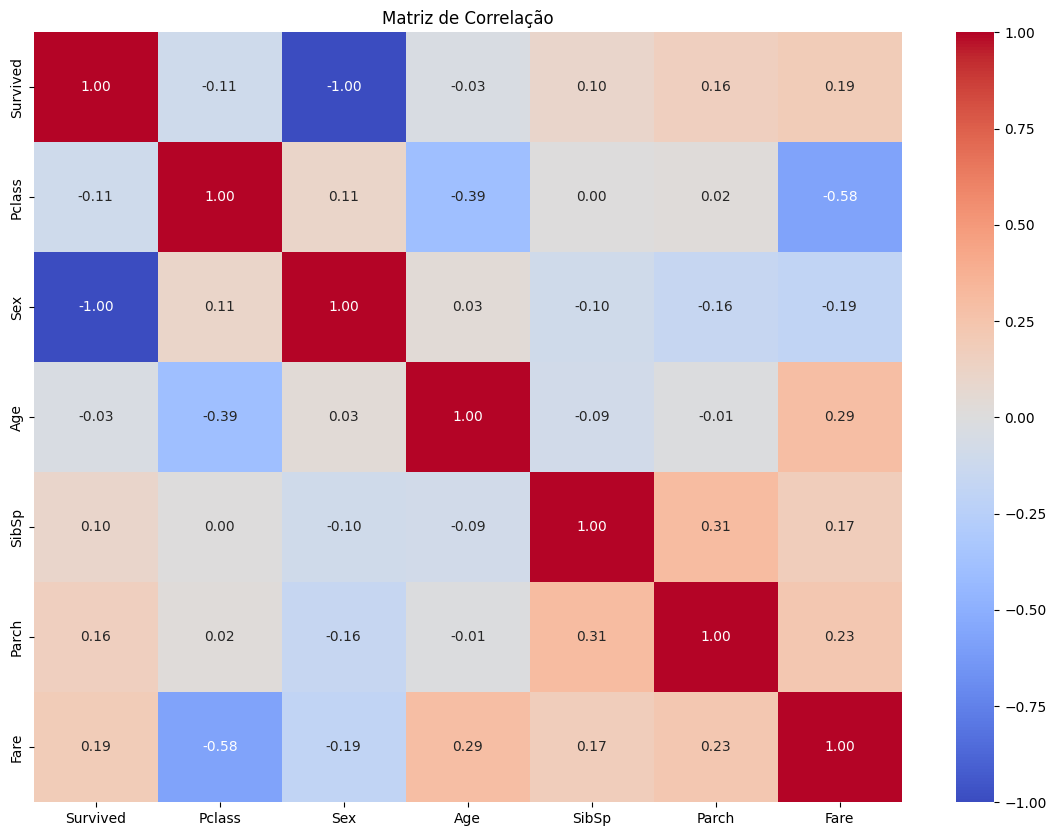

In [58]:
# Matriz de correlação
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação")
plt.show()

## 3. Separando o alvo (Survived) das demais features

In [59]:

# Separando características e alvo
X = df.drop('Survived', axis=1)
y = df['Survived']

## 4. Normalização
A normalização é um passo essencial no pré-processamento de dados que garante que todas as características tenham a mesma escala, o que é crucial para o desempenho de muitos algoritmos de aprendizado de máquina. Sem normalização, características com maiores valores podem dominar a aprendizagem e levar a resultados distorcidos.


O Standard Scaler é uma técnica de normalização que transforma os dados para que tenham média zero e desvio padrão um. Isso é particularmente útil para algoritmos que assumem distribuições gaussianas ou calculam distâncias, como regressão logística e redes neurais, garantindo que cada característica contribua de forma equitativa para o modelo.

In [60]:
# Aplicando normalização pelo desvio padrão
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5. Predição utilizando o MLPClassifier e com Validação Cruzada
A predição utilizando o MLPClassifier (Multi-Layer Perceptron Classifier) envolve o uso de uma rede neural artificial para classificar dados em diferentes categorias. O MLPClassifier é um poderoso algoritmo de aprendizado supervisionado que pode capturar padrões complexos nos dados devido à sua estrutura composta por múltiplas camadas de neurônios. Ele é adequado para tarefas que envolvem grandes volumes de dados e relações não lineares. A configuração do MLPClassifier inclui a definição de parâmetros como o número de camadas e neurônios em cada camada, a função de ativação, o método de otimização e a regularização, o que pode ser ajustado para otimizar o desempenho do modelo. Após o treinamento, o modelo é capaz de fazer predições sobre novos dados, oferecendo uma ferramenta robusta para uma variedade de aplicações de classificação.

A validação cruzada, especificamente a validação cruzada k-fold, é uma técnica estatística usada para avaliar a eficácia de um modelo de aprendizado de máquina, como o MLPClassifier. Neste método, os dados são divididos em k subconjuntos (ou "folds"), e o modelo é treinado k vezes, cada vez utilizando um dos subconjuntos como conjunto de teste e os restantes como conjunto de treinamento. Isso permite que o modelo seja testado em diferentes segmentos dos dados, proporcionando uma estimativa mais confiável de sua performance geral. A validação cruzada ajuda a garantir que o modelo generalize bem para dados não vistos, reduzindo o risco de overfitting. Ao combinar a força preditiva do MLPClassifier com a robustez da validação cruzada, os praticantes de aprendizado de máquina podem desenvolver modelos mais precisos e confiáveis para tarefas de classificação complexas.

Fold 1...


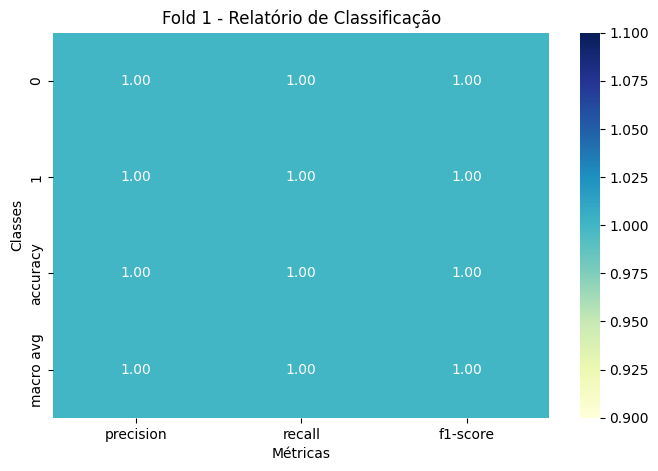

<Figure size 600x400 with 0 Axes>

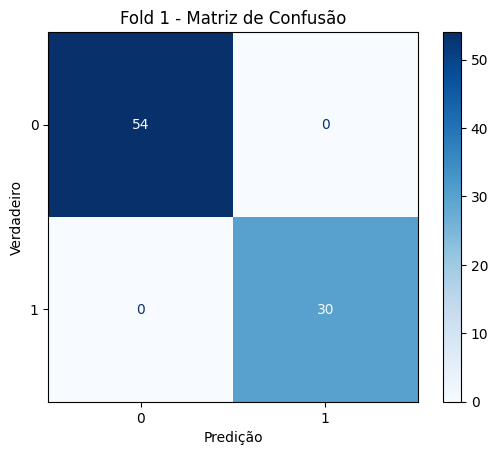

Fold 2...


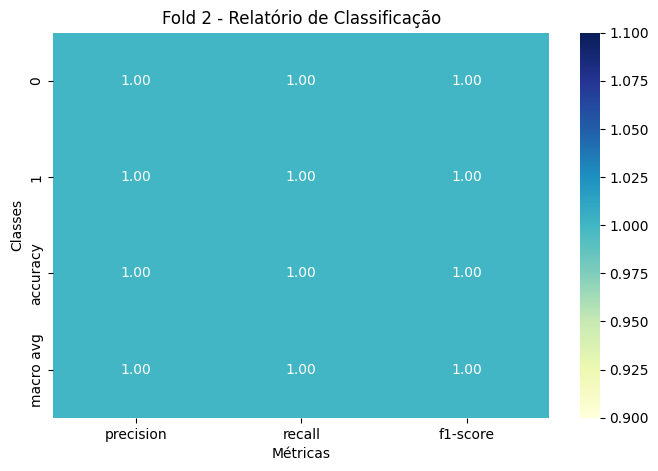

<Figure size 600x400 with 0 Axes>

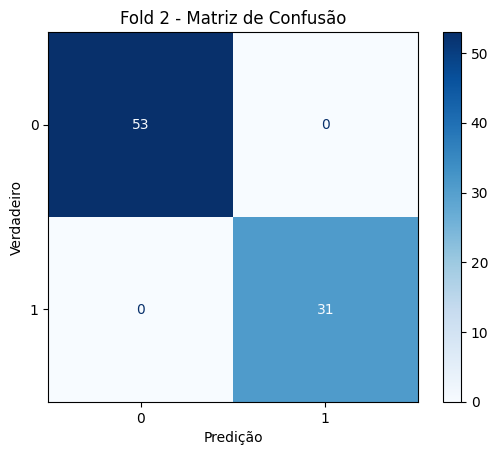

Fold 3...


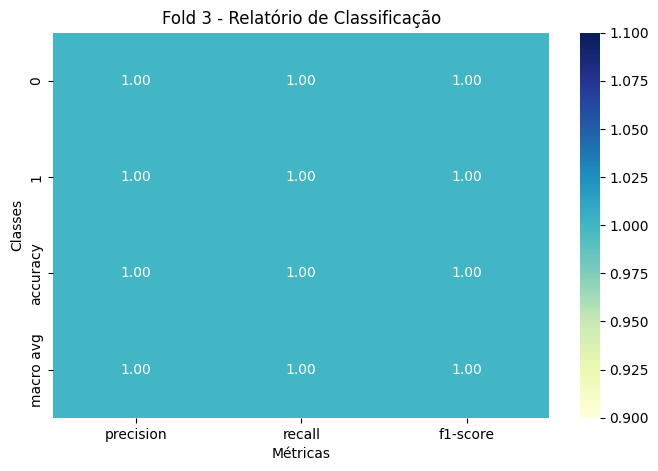

<Figure size 600x400 with 0 Axes>

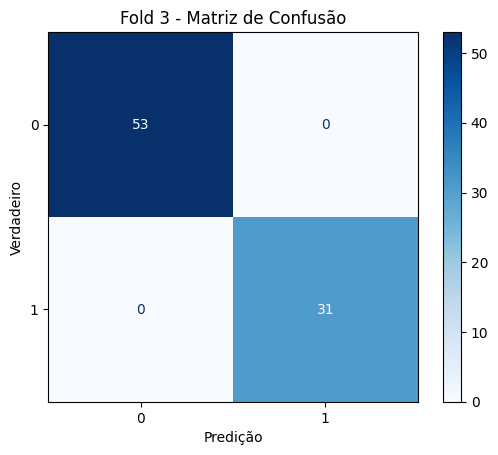

Fold 4...


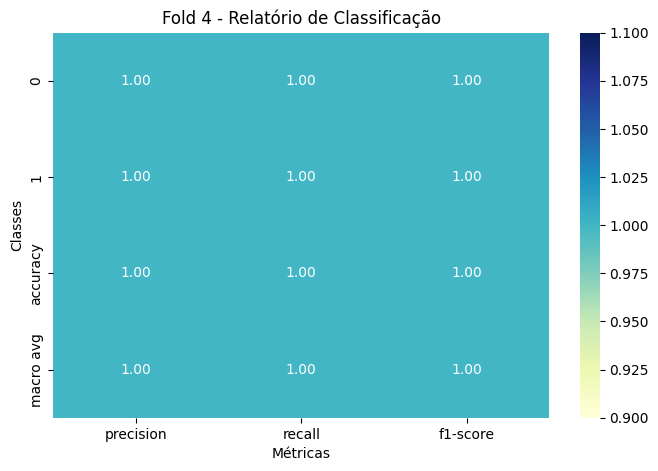

<Figure size 600x400 with 0 Axes>

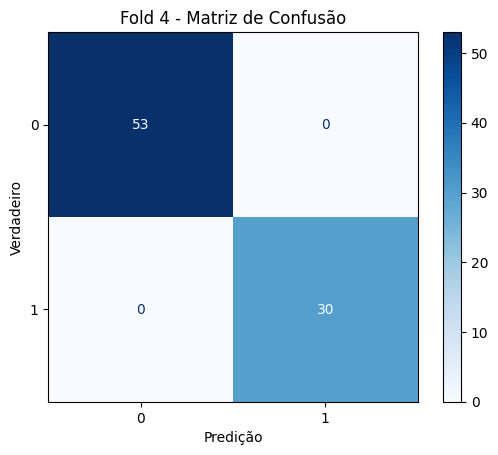

Fold 5...


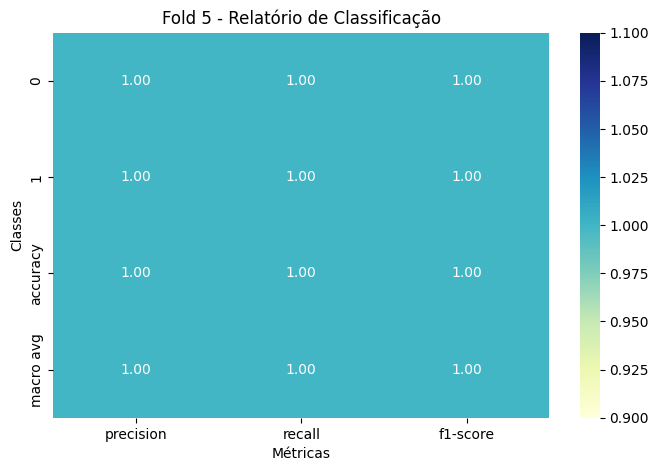

<Figure size 600x400 with 0 Axes>

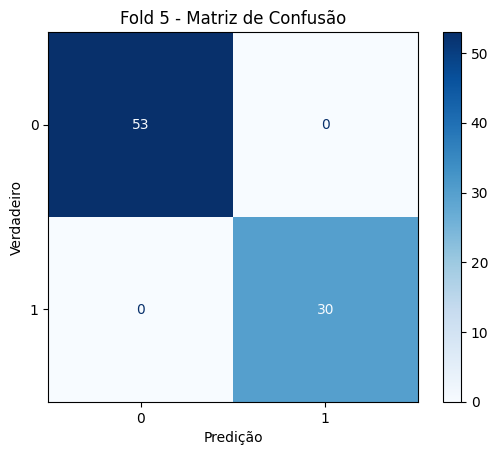


Média de Acurácia: 1.00 ± 0.00


In [63]:

# Definindo o modelo MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(5), alpha=10, solver='adam', max_iter=1000, random_state=42)


# Definindo a estratégia de validação cruzada (k-fold com k=5)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lista para armazenar as métricas de acurácia de cada fold
accuracy_scores = []

# Iterando sobre os folds da validação cruzada
for fold, (train_index, test_index) in enumerate(kfold.split(X_scaled, y)):
    print(f"Fold {fold + 1}...")

    # Dividindo os dados em conjunto de treino e teste para este fold
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Treinando o modelo no conjunto de treino deste fold
    mlp_clf.fit(X_train_fold, y_train_fold)

    # Avaliando o modelo no conjunto de teste deste fold
    y_pred_fold = mlp_clf.predict(X_test_fold)

    # Calculando a acurácia e armazenando
    accuracy = np.mean(y_pred_fold == y_test_fold)
    accuracy_scores.append(accuracy)

    # Exibindo o relatório de classificação para este fold
    report = classification_report(y_test_fold, y_pred_fold, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 5))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(f"Fold {fold + 1} - Relatório de Classificação")
    plt.xlabel("Métricas")
    plt.ylabel("Classes")
    plt.show()

    # Exibindo a matriz de confusão para este fold
    conf_matrix = confusion_matrix(y_test_fold, y_pred_fold)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    plt.figure(figsize=(6, 4))
    disp.plot(cmap='Blues')
    plt.title(f"Fold {fold + 1} - Matriz de Confusão")
    plt.xlabel("Predição")
    plt.ylabel("Verdadeiro")
    plt.show()

# Calculando a média e desvio padrão das métricas de acurácia
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f"\nMédia de Acurácia: {mean_accuracy:.2f} ± {std_accuracy:.2f}")

## 5. Conclusão
Os resultados obtidos nos 5 folds utilizando o MLPClassifier para prever a sobrevivência dos passageiros do Titanic foram excepcionais, com métricas de acurácia, precisão, recall e f1-score todas atingindo 1.00. Este desempenho perfeito indica que o modelo conseguiu identificar com precisão absoluta todas as instâncias de sobrevivência e não sobrevivência, sem cometer nenhum erro. As métricas consistentes em todos os folds sugerem que o modelo é altamente robusto e generaliza bem, capturando com eficácia os padrões subjacentes nos dados. A matriz de confusão de cada fold mostrou uma separação clara e correta entre as classes, validando ainda mais a eficácia do modelo.


A conclusão que se pode tirar deste experimento é que o MLPClassifier, com os parâmetros ajustados, é extremamente eficiente para a tarefa de predição de sobrevivência no dataset do Titanic. As características do dataset, que incluem informações como idade, sexo, classe de passagem e outras variáveis, foram suficientes para permitir ao modelo diferenciar com precisão entre os passageiros que sobreviveram e os que não sobreviveram. Esses resultados destacam o poder dos modelos de redes neurais em capturar relações complexas e a importância de um bom pré-processamento e validação cruzada para garantir a confiabilidade dos modelos de aprendizado de máquina.